In [1]:
import numpy as np
from algorithms.random_forest import (
    RandomForestClassifier,
    train_test_split,
    accuracy,
    plot_decision_boundary,
)

# two blobs, a bit noisy
np.random.seed(0)
A = np.random.randn(120, 2) * 0.5 + [2, 2]
B = np.random.randn(110, 2) * 0.6 + [6, 6]
X = np.vstack([A, B])
y = np.array([0] * len(A) + [1] * len(B))

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_ratio=0.3)

In [2]:
rf = RandomForestClassifier(n_estimators=30, max_depth=8, verbose=True, oob=True).fit(
    X_tr, y_tr
)

print("\nOOB accuracy :", rf.oob_score(X_tr, y_tr).round(3))

Tree 0: depth≈2  features=[1]
Tree 1: depth≈2  features=[1]
Tree 2: depth≈2  features=[1]
Tree 3: depth≈2  features=[0]
Tree 4: depth≈2  features=[1]
Tree 5: depth≈2  features=[0]
Tree 6: depth≈2  features=[0]
Tree 7: depth≈2  features=[1]
Tree 8: depth≈2  features=[1]
Tree 9: depth≈2  features=[1]
Tree 10: depth≈2  features=[1]
Tree 11: depth≈2  features=[1]
Tree 12: depth≈2  features=[0]
Tree 13: depth≈2  features=[1]
Tree 14: depth≈2  features=[0]
Tree 15: depth≈2  features=[0]
Tree 16: depth≈2  features=[1]
Tree 17: depth≈2  features=[1]
Tree 18: depth≈2  features=[1]
Tree 19: depth≈2  features=[1]
Tree 20: depth≈2  features=[0]
Tree 21: depth≈2  features=[1]
Tree 22: depth≈2  features=[0]
Tree 23: depth≈2  features=[0]
Tree 24: depth≈2  features=[1]
Tree 25: depth≈2  features=[1]
Tree 26: depth≈2  features=[1]
Tree 27: depth≈2  features=[0]
Tree 28: depth≈2  features=[1]
Tree 29: depth≈2  features=[0]

OOB accuracy : 0.994


Test accuracy: 1.0


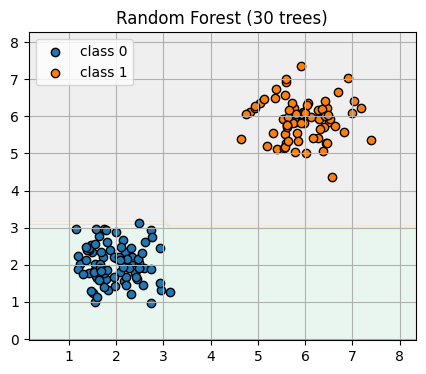

In [3]:
print("Test accuracy:", accuracy(y_te, rf.predict(X_te)).round(3))
plot_decision_boundary(rf, X_tr, y_tr, title="Random Forest (30 trees)")

In [4]:
from collections import Counter

feat_counts = Counter()
for f_idx in rf.features_:  # which feature set each tree saw
    for f in f_idx:
        feat_counts[f] += 1
print("Feature usage count:", feat_counts)

Feature usage count: Counter({np.int64(1): 19, np.int64(0): 11})
